In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
normtemp = pd.read_csv("normtemp.csv")
normtemp.describe()

,Temp,Sex,Beats
count,130.000000,130.000000,130.000000
mean,98.249231,1.500000,73.761538
std,0.733183,0.501934,7.062077
min,96.300000,1.000000,57.000000
25%,97.800000,1.000000,69.000000
50%,98.300000,1.500000,74.000000
75%,98.700000,2.000000,79.000000
max,100.800000,2.000000,89.000000


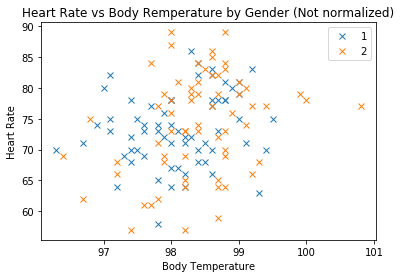

In [3]:
groups = normtemp.groupby("Sex")
for name, group in groups:
    plt.plot(group["Temp"], group["Beats"], marker='x', linestyle="", label=name)
plt.ylabel("Heart Rate")
plt.xlabel("Body Temperature")
plt.title("Heart Rate vs Body Remperature by Gender (Not normalized)")
plt.legend()

In [4]:
normalized_normtemp = (normtemp - normtemp.mean()) / normtemp.std()
normalized_normtemp.describe()

,Temp,Sex,Beats
count,1.300000e+02,1.300000e+02,1.300000e+02
mean,8.184906e-15,5.465713e-17,-3.757678e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.658586e+00,-9.961464e-01,-2.373457e+00
25%,-6.127129e-01,-9.961464e-01,-6.742405e-01
50%,6.924495e-02,0.000000e+00,3.376649e-02
75%,6.148112e-01,9.961464e-01,7.417735e-01
max,3.479034e+00,9.961464e-01,2.157788e+00


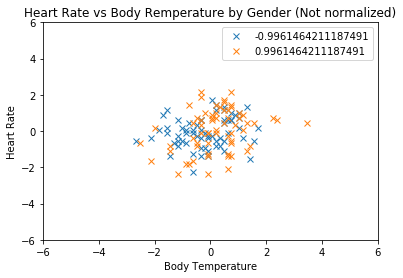

In [5]:
groups_normalized = normalized_normtemp.groupby("Sex")
for name, group in groups_normalized:
    plt.plot(group["Temp"], group["Beats"], marker='x', linestyle="", label=name)
plt.ylabel("Heart Rate")
plt.xlabel("Body Temperature")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.title("Heart Rate vs Body Remperature by Gender (Not normalized)")
plt.legend()

In [6]:
corr = 0
for i in range(0, len(normalized_normtemp - 1)):
    corr += normalized_normtemp['Temp'][i] * normalized_normtemp['Beats'][i]
corr /= len(normalized_normtemp)
corr

0.25170519962291227

In [7]:
normalized_normtemp.corr()

,Temp,Sex,Beats
Temp,1.000000,0.198006,0.253656
Sex,0.198006,1.000000,0.055766
Beats,0.253656,0.055766,1.000000


In [8]:
normtemp.corr()

,Temp,Sex,Beats
Temp,1.000000,0.198006,0.253656
Sex,0.198006,1.000000,0.055766
Beats,0.253656,0.055766,1.000000


In [9]:
bodyfat = pd.read_csv("Body Fat.csv")
bodyfat

,Subject,Density,%Body Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,249,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,250,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,251,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [10]:
bodyfat.corr()

,Subject,Density,%Body Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Subject,1.000000,-0.106387,0.112169,0.341254,0.033728,-0.013326,0.071112,0.120515,0.121720,-0.023737,-0.080708,0.047939,-0.032442,-0.015677,0.001960,0.081845
Density,-0.106387,1.000000,-0.997038,-0.289225,-0.611352,0.018439,-0.487215,-0.700337,-0.810916,-0.623222,-0.560705,-0.511949,-0.321369,-0.492104,-0.362606,-0.349207
%Body Fat,0.112169,-0.997038,1.000000,0.290203,0.612916,-0.025552,0.490716,0.702947,0.814032,0.625669,0.561319,0.508538,0.321552,0.493589,0.362236,0.346559
Age,0.341254,-0.289225,0.290203,1.000000,-0.012746,-0.245212,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.148093,-0.041162,-0.085056,0.213531
Weight,0.033728,-0.611352,0.612916,-0.012746,1.000000,0.486888,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.751835,0.800416,0.630301,0.729775
Height,-0.013326,0.018439,-0.025552,-0.245212,0.486888,1.000000,0.321141,0.226829,0.189766,0.372106,0.338558,0.500501,0.469213,0.318507,0.322027,0.397780
Neck,0.071112,-0.487215,0.490716,0.113505,0.830716,0.321141,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.587981,0.731146,0.623660,0.744826
Chest,0.120515,-0.700337,0.702947,0.176450,0.894191,0.226829,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.592562,0.727907,0.580173,0.660162
Abdomen,0.121720,-0.810916,0.814032,0.230409,0.887995,0.189766,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.566640,0.684983,0.503316,0.619832
Hip,-0.023737,-0.623222,0.625669,-0.050332,0.940884,0.372106,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.691427,0.739273,0.545014,0.630090


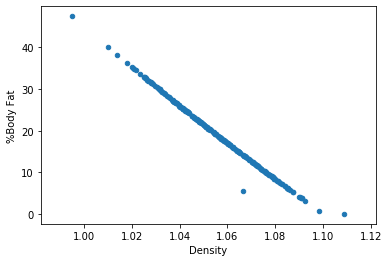

In [11]:
bodyfat.plot.scatter(x='Density', y='%Body Fat')

In [24]:
weapons = pd.read_csv("1033-program-foia-may-2014.txt")
weapons.head(5)

,State,County,NSN,Item Name,Quantity,UI,Acquisition Cost,Ship Date
0,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30
1,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30
2,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30
3,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30
4,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30


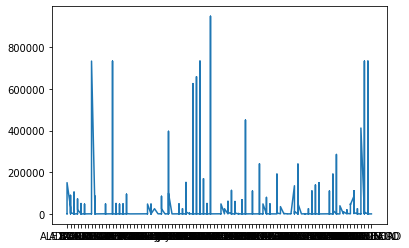

In [25]:
plt.plot(weapons[weapons.State == 'IL']["County"], weapons[weapons.State == 'IL']["Acquisition Cost"])